# Applying a Linear model for regression

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, PredictionErrorDisplay

## Reading the logaritmic dataset

In [8]:
DATA = pd.read_csv("../Log_FinalData.csv", index_col="Unnamed: 0")
DATA

,log_pctWSocSec,log_perCapInc,log_PctEmplProfServ,log_FemalePctDiv,log_NumImmig,log_PctImmigRec10,log_PctPersOwnOccup,log_PctHousLess3BR,log_OwnOccLowQuart,log_PctSameCity85,log_PctSameState85,log_LandArea,log_PopDens,log_PctUsePubTrans,log_ViolentCrimesPerPop,log_racepctblack,log_racePctWhite,log_racePctAsian,log_racePctHisp
0,0.110590,0.146128,0.149219,0.243038,0.012837,0.143015,0.190332,0.178977,0.086360,0.178977,0.214844,0.049218,0.100371,0.079181,0.079181,0.008600,0.278754,0.049218,0.068186
1,0.096910,0.136721,0.060698,0.281033,0.004321,0.212188,0.100371,0.260071,0.082785,0.204120,0.181844,0.008600,0.049218,0.161368,0.222716,0.049218,0.240549,0.161368,0.029384
2,0.139879,0.103804,0.110590,0.232996,0.000000,0.075547,0.152288,0.178977,0.071882,0.222716,0.193125,0.004321,0.082785,0.008600,0.155336,0.173186,0.193125,0.068186,0.017033
3,0.133539,0.133539,0.161368,0.173186,0.008600,0.117271,0.287802,0.004321,0.093422,0.214844,0.217484,0.008600,0.143015,0.107210,0.049218,0.301030,0.033424,0.049218,0.041393
4,0.158362,0.155336,0.139879,0.079181,0.000000,0.103804,0.276462,0.075547,0.117271,0.206826,0.184691,0.017033,0.037426,0.008600,0.012837,0.008600,0.290035,0.037426,0.021189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.113943,0.173186,0.225309,0.201397,0.004321,0.167317,0.190332,0.173186,0.079181,0.170262,0.143015,0.004321,0.107210,0.021189,0.037426,0.041393,0.271842,0.049218,0.064458
1990,0.100371,0.071882,0.149219,0.193125,0.021189,0.222716,0.049218,0.204120,0.133539,0.041393,0.000000,0.008600,0.136721,0.079181,0.161368,0.164353,0.107210,0.262451,0.120574
1991,0.198657,0.117271,0.146128,0.176091,0.025306,0.100371,0.139879,0.220108,0.123852,0.252853,0.245513,0.033424,0.120574,0.071882,0.089905,0.096910,0.227887,0.017033,0.096910
1992,0.152288,0.146128,0.195900,0.113943,0.025306,0.173186,0.143015,0.214844,0.187521,0.201397,0.181844,0.012837,0.139879,0.123852,0.075547,0.025306,0.271842,0.086360,0.041393


## Creating train and test sets for model fitting
70% and 30% of the whole date were considered for the trainining and testing datasets.

In [9]:
X = DATA.drop(["log_ViolentCrimesPerPop"],axis=1).copy()
Y = DATA.log_ViolentCrimesPerPop

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.size, X_test.size

(25110, 10782)

# Fitting training data under linear model

A pair of assumptions will be made for this linear model:
- The intercept is zero because we should not expect some "intrinsic" number of violent crimes in any community independent of the magnitudes of social/economic parameters.
- The slope for each variable will be considered positive since that could lead to negative predicted values and those results would be complicated to transform back to the original data since a logaritmic transformation had been made and, therefore, even more hard to interpret.

In [10]:
Linear_Regressor = LinearRegression(fit_intercept=False, positive=True)
Linear_Regressor.fit(X_train, Y_train)

Y_pred = Linear_Regressor.predict(X_test)

## Obtaining scores for Linear model

In [11]:

MS2_E_LR = mean_squared_error(Y_test, Y_pred, squared=False)
MA_E_LR = mean_absolute_error(Y_test, Y_pred)
R2_LR = r2_score(Y_test, Y_pred)

print(f"{MS2_E_LR=} ")
print(f"{MA_E_LR=} ")
print(f"{R2_LR=} ")

%store MS2_E_LR
%store MA_E_LR
%store R2_LR

MS2_E_LR=0.0450098647192509 
MA_E_LR=0.034184022848590075 
R2_LR=0.5906835402647382 
Stored 'MS2_E_LR' (float64)
Stored 'MA_E_LR' (float64)
Stored 'R2_LR' (float64)


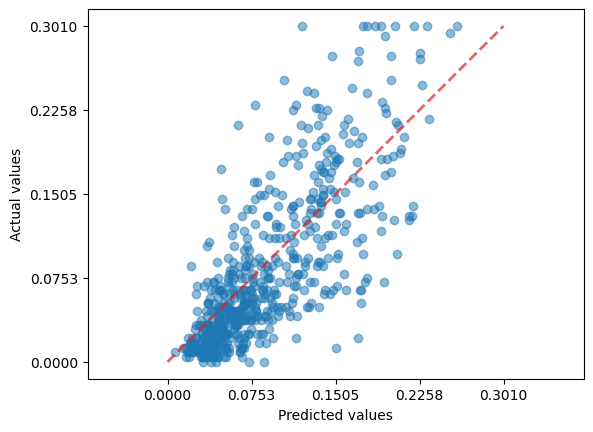

In [12]:
PredictionErrorDisplay.from_predictions(y_true=Y_test, y_pred=Y_pred, kind="actual_vs_predicted",
                       scatter_kwargs={"alpha":0.5, "color":"tab:blue"},
                       line_kwargs={"color":"tab:red", "linewidth":2.0})